# Sales Data Analysis & Visualization Notebook

This notebook analyzes the **Sales** dataset (9,994 entries, 11 columns) through four main analysis pillars:

1. **Exploratory Overview**
2. **Regional & Geographic Insights**
3. **Product & Category Performance**
4. **Promotion & Temporal Dynamics**

Each section poses clear questions, runs code with pandas, Matplotlib, and Seaborn, and provides interpretation of results.


In [43]:
# 0. Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
palette_color = sns.color_palette('deep')[0]
df = pd.read_csv('sales_data.csv')  # adjust filename accordingly

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu



---

## 1. Exploratory Overview

### Q1: What is the overall distribution of **Profit** values? Is there any outliers?

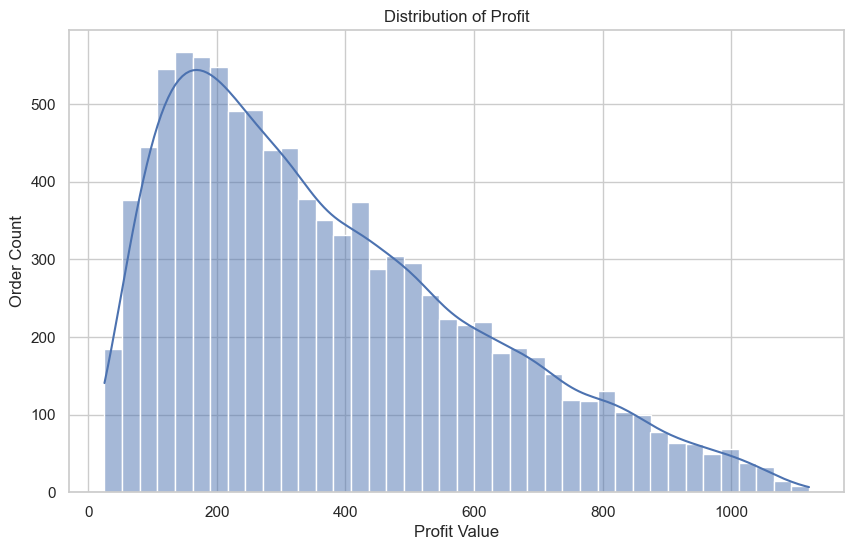

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], bins=40, kde=True, color=palette_color)
plt.title('Distribution of Profit')
plt.xlabel('Profit Value')
plt.ylabel('Order Count')
plt.show()

### Q2: What is the relationship between **Sales** and **Profit** per order?

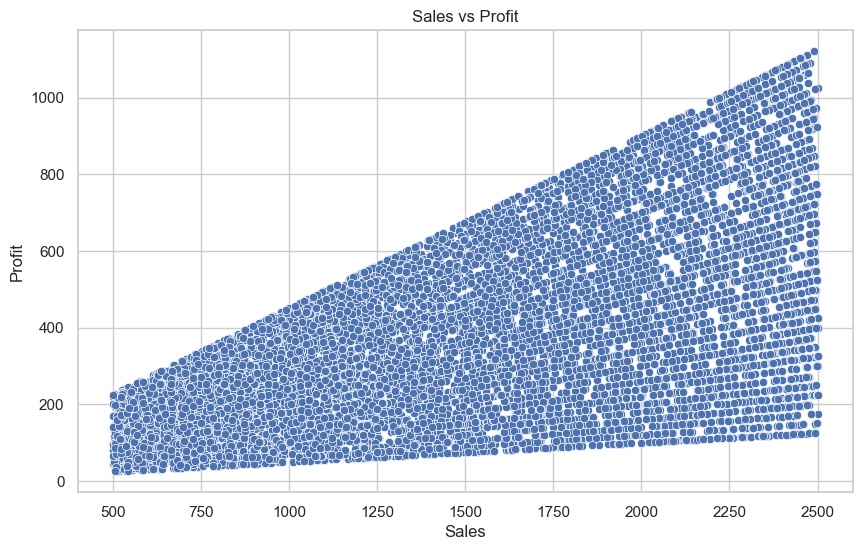

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

## 2. Regional & Geographic Insights

### Q3a: Which **Region** drives the highest average **sales**?

    Region  Average_Sales  Average_Profit
3    South    1507.387894      385.153113
4     West    1498.202623      372.152548
0  Central    1492.964270      368.836350
1     East    1491.702247      377.228083
2    North    1254.000000      401.280000


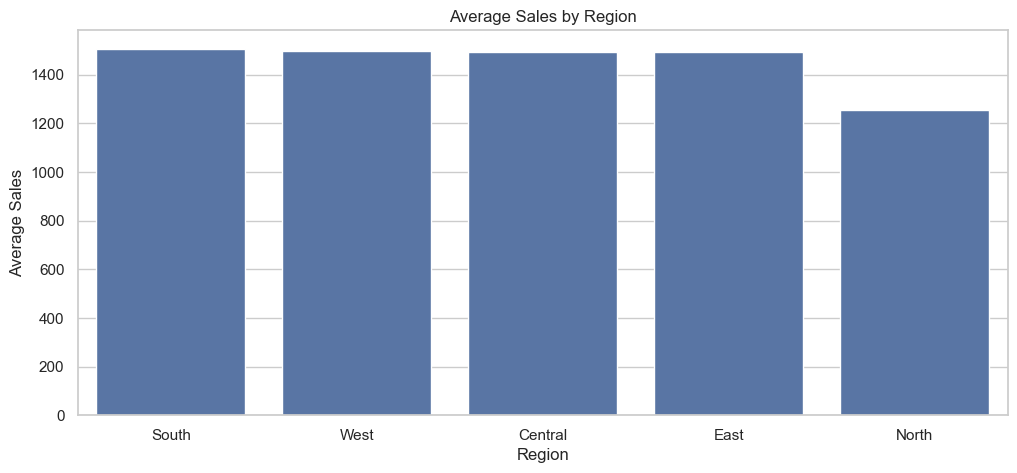

In [26]:
region_perf = (
    df.groupby('Region', as_index=False)
      .agg(Average_Sales=('Sales','mean'), Average_Profit=('Profit','mean'))
      .sort_values('Average_Sales', ascending=False)
)
print(region_perf)

plt.figure(figsize=(12,5))
sns.barplot(x='Region', y='Average_Sales', data=region_perf, color=palette_color)
plt.title('Average Sales by Region')
plt.ylabel('Average Sales')
plt.show()


### Q3b: Which **Region** drives the highest average **profit**?

    Region  Average_Profit
2    North      401.280000
3    South      385.153113
1     East      377.228083
4     West      372.152548
0  Central      368.836350


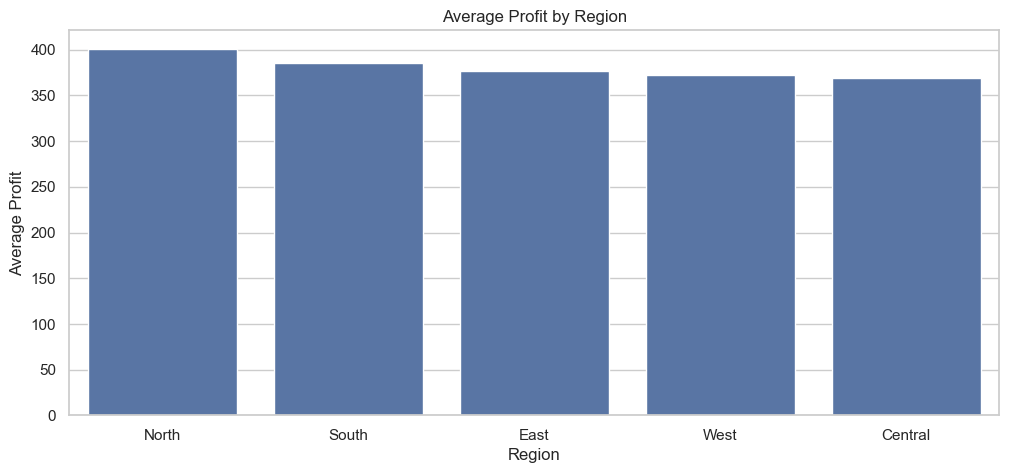

In [27]:
region_avg_profit = (
    df.groupby('Region', as_index=False)
      .agg(Average_Profit=('Profit','mean'))
      .sort_values('Average_Profit', ascending=False)
)
print(region_avg_profit)

plt.figure(figsize=(12,5))
sns.barplot(x='Region', y='Average_Profit', data=region_avg_profit, color=palette_color)
plt.title('Average Profit by Region')
plt.ylabel('Average Profit')
plt.show()

### Q4a: Top Cities in West Region: Which cities in the **West** region generate the most total sales?  

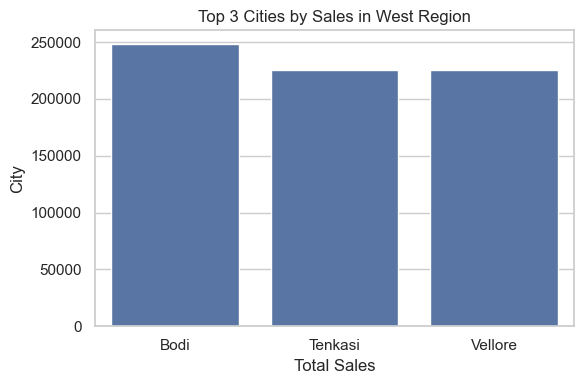

In [41]:
west_top = (
    df[df['Region']=='West']
      .groupby('City', as_index=False)
      .agg(Total_Sales=('Sales','sum'))
      .sort_values('Total_Sales', ascending=False)
      .head(3)
)

plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Total_Sales', data=west_top, color=palette_color)
plt.title('Top 3 Cities by Sales in West Region')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Q4b: Top Cities in Central Region: Which cities in the **Central** region generate the most total sales?  

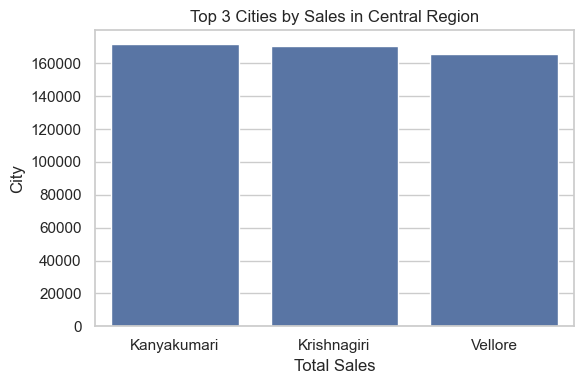

In [40]:
central_top = (
    df[df['Region']=='Central']
      .groupby('City', as_index=False)
      .agg(Total_Sales=('Sales','sum'))
      .sort_values('Total_Sales', ascending=False)
      .head(3)
)

plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Total_Sales', data=central_top, color=palette_color)
plt.title('Top 3 Cities by Sales in Central Region')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Q4c: Top Cities in East Region: Which cities in the **East** region generate the most total sales?  

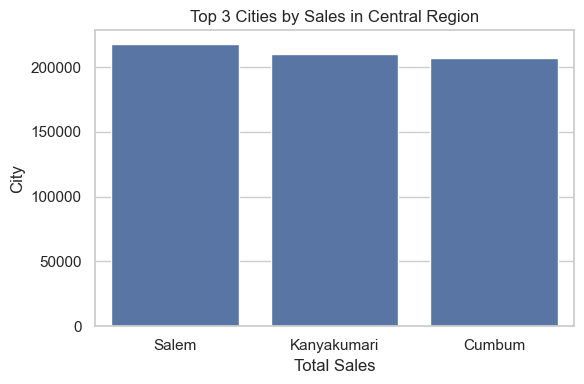

In [42]:
central_top = (
    df[df['Region']=='East']
      .groupby('City', as_index=False)
      .agg(Total_Sales=('Sales','sum'))
      .sort_values('Total_Sales', ascending=False)
      .head(3)
)

plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Total_Sales', data=central_top, color=palette_color)
plt.title('Top 3 Cities by Sales in Central Region')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

## 3. Product & Category Performance

### Q5a: Which **Category** contributes the most to total sales?

C:\Users\bonpa\AppData\Local\Temp\ipykernel_10664\677572834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Category', data=cat_perf, palette='muted')


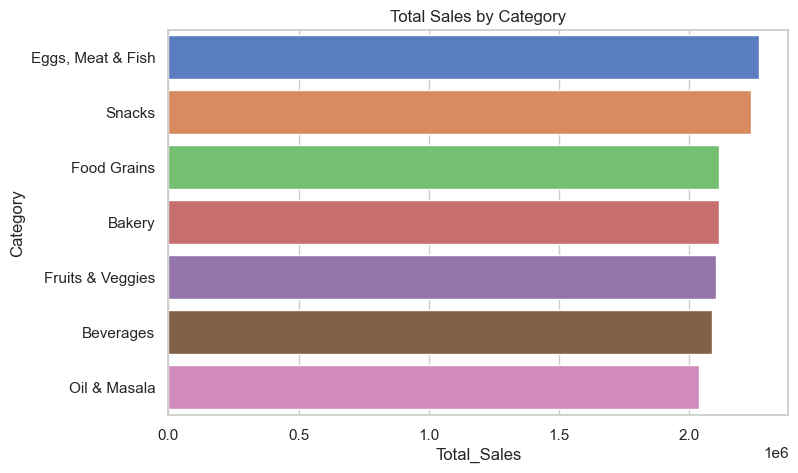

In [31]:
cat_perf = (
    df.groupby('Category', as_index=False)
      .agg(Total_Sales=('Sales','sum'), Total_Profit=('Profit','sum'))
      .sort_values('Total_Sales', ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x='Total_Sales', y='Category', data=cat_perf, palette='muted')
plt.title('Total Sales by Category')
plt.show()

### Q5b: Which **Category** contributes the most to total profit?

C:\Users\bonpa\AppData\Local\Temp\ipykernel_10664\3558093819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Category', data=cat_perf, palette='tab10')


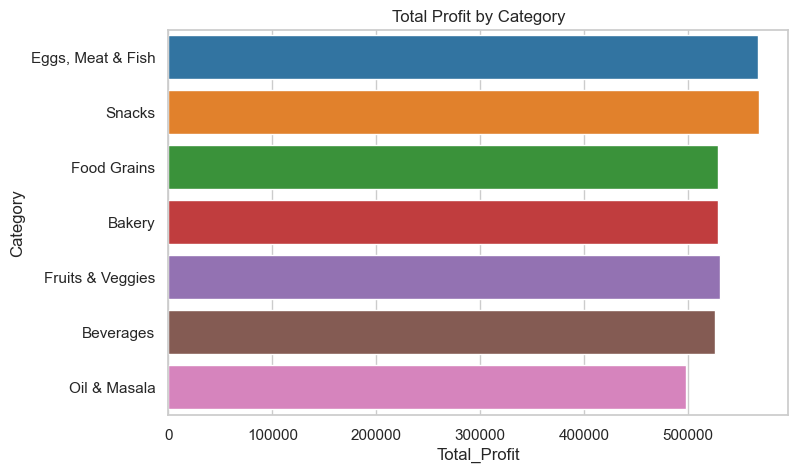

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Profit', y='Category', data=cat_perf, palette='tab10')
plt.title('Total Profit by Category')
plt.show()

### Q6: What are the top 5 **Sub-Categories** by total sales?

C:\Users\bonpa\AppData\Local\Temp\ipykernel_10664\990419894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Sub Category', data=sub_perf, palette='Set2')


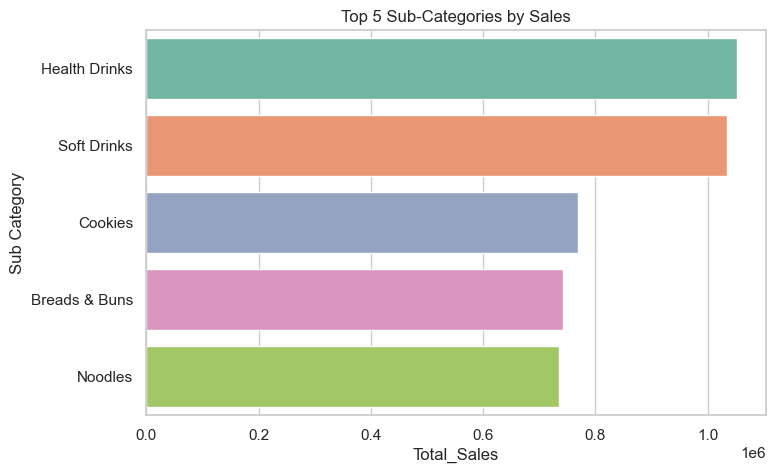

In [39]:
sub_perf = (
    df.groupby('Sub Category', as_index=False)
      .agg(Total_Sales=('Sales','sum'))
      .sort_values('Total_Sales', ascending=False)
      .head(5)
)

plt.figure(figsize=(8,5))
sns.barplot(x='Total_Sales', y='Sub Category', data=sub_perf, palette='Set2')
plt.title('Top 5 Sub-Categories by Sales')
plt.show()

## 4. Promotion & Temporal Dynamics

### Q7: How do **discount brackets** impact average profit?

In [34]:
# Define conditions and corresponding choices
conditions = [
    (df['Discount'] <= 0.1), 
    (df['Discount'] > 0.1) & (df['Discount'] <= 0.2),
    (df['Discount'] > 0.2) & (df['Discount'] <= 0.3),
    (df['Discount'] > 0.3)
]

choices = ['<=10%', '10-20%', '20-30%', '>30%']

# Create new column 'Discount_Category' based on conditions
df['Discount_Category'] = np.select(conditions, choices)
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Discount_Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,10-20%
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,10-20%
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,20-30%
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,20-30%
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,20-30%


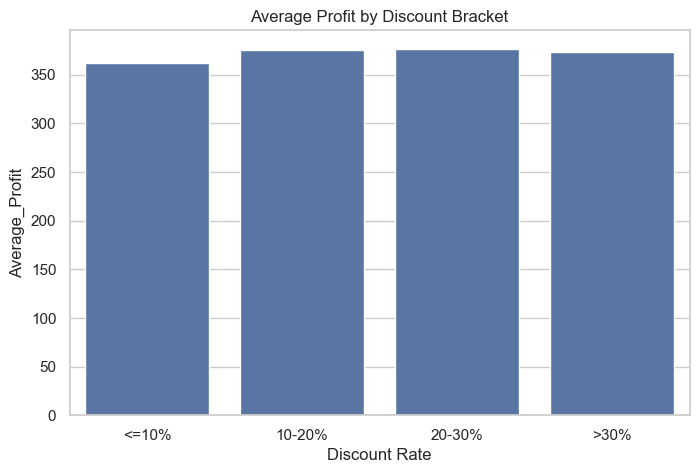

In [36]:
# Create discount bins
disc_perf = (
    df.groupby('Discount_Category', as_index=False)
    .agg(Average_Profit=('Profit','mean'))
    .sort_values('Average_Profit', ascending=True)
)

plt.figure(figsize=(8,5))
sns.barplot(x='Discount_Category', y='Average_Profit', data=disc_perf, color=palette_color, order=['<=10%', '10-20%', '20-30%', '>30%'])
plt.title('Average Profit by Discount Bracket')
plt.xlabel('Discount Rate')
plt.show()

### Q8: How do sales and profit **trend monthly**?

In [54]:
# Convert 'Order Date' with proper parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

# Monthly aggregation
time = (
    df.resample('M', on='Order Date')
    .agg(Monthly_Sales=('Sales','sum'), Monthly_Profit=('Profit','sum'))
    .reset_index()
)
time.head()


C:\Users\bonpa\AppData\Local\Temp\ipykernel_10664\3480115986.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Order Date')


,Order Date,Monthly_Sales,Monthly_Profit
0,2015-01-31,203014,54689.18
1,2015-02-28,120444,32737.87
2,2015-03-31,260072,66217.50
3,2015-04-30,176187,46030.20
4,2015-05-31,218740,50899.84


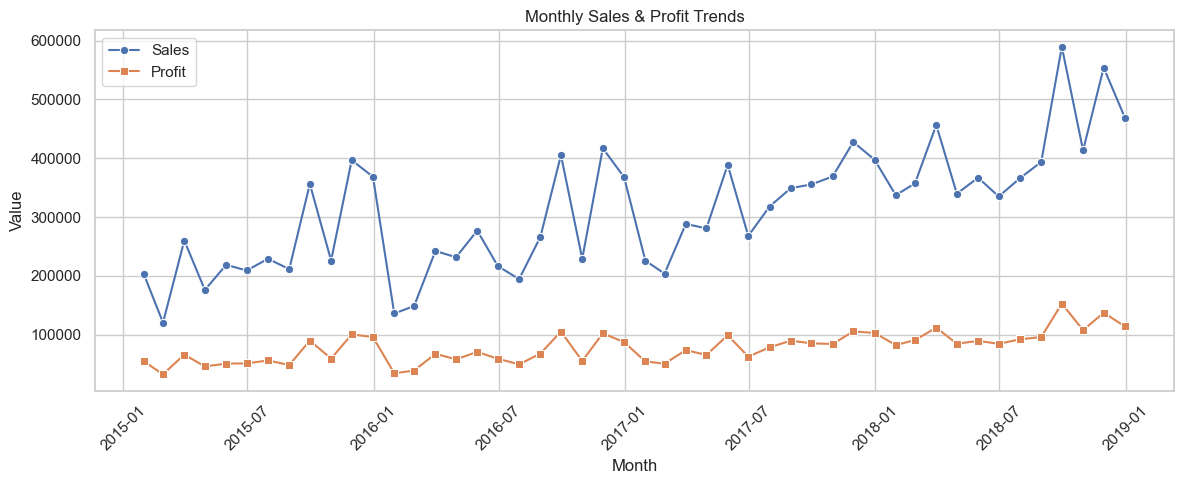

In [53]:

# Seaborn line plot for trends
plt.figure(figsize=(12,5))
sns.lineplot(data=time, x='Order Date', y='Monthly_Sales', marker='o', label='Sales')
sns.lineplot(data=time, x='Order Date', y='Monthly_Profit', marker='s', label='Profit')
plt.title('Monthly Sales & Profit Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*End of Sales Analysis Notebook.*